In [1]:
gROOT->ProcessLine(".L /home/rj/app/lib/libRadioScatter.so");
gROOT->ProcessLine("#include </home/rj/app/include/RadioScatter/RadioScatter.hh>");
gROOT->ProcessLine("#include </home/rj/app/include/RadioScatter/RSEventSummary.hh>");
gROOT->ProcessLine("#include </home/rj/app/include/RadioScatter/RadioScatterEvent.hh>");
gROOT->ProcessLine("#include </home/rj/app/include/RadioScatter/TUtilRadioScatter.hh>");
TString infile = "/home/rj/RadioScatter/doc/smallmultiscat_0MHz_10W_10ns.root";
auto ff=TFile::Open(infile, "READ");
TFile *outfile = new TFile("/home/rj/RadioScatter/outputfiles/voltage_time_angle.root", "RECREATE");
TTree *outtree = new TTree("tree", "test label");

int rxindex = 0;
int txindex = 0;
int antenna = 0;
int entry = 0;
auto tree=(TTree*)ff->Get("tree");

In [2]:
auto event= new RadioScatterEvent();
tree->SetBranchAddress("event", &event);
tree->GetEntry(29);
// tree->GetEntries();
cout << event->nrx;
c1 = TUtilRadioScatter::canvas();

3

In [ ]:
double bob=event->peakPowerW(0,0);
cout << "peakPowerW: " << bob << endl;

double joe=event->peakFreq(0,0);
cout << "peakFreq: " << joe << endl;

In [ ]:
int *triggers = new int[tree->GetEntries()];
for(int i = 0; i < tree->GetEntries(); i++){
    triggers[i] = 
}

In [ ]:
cout << tree->GetEntries() << endl;
cout << event->nrx << endl;
cout << event->ntx << endl;
    
cout << (tree->GetEntries() * event->nrx * event->ntx) << endl;
    

In [3]:
int entries = tree->GetEntries();
int rxs = event->nrx;
//make a 2d array of size (entries, rxs)
    float **power_array = new float*[entries];
    for(int i = 0; i < entries; ++i){
        power_array[i] = new float[rxs];
    }
    //make a 2d array of size (entries, rxs)
    float **freq_array = new float*[entries];
    for(int i = 0; i < entries; ++i){
        freq_array[i] = new float[rxs];
    }

freq_array[0][0] = 1;

cout << freq_array[0][0] << endl;

1


In [4]:
int entries = tree->GetEntries();
int rxs = event->nrx;
//make a 2d array of size (entries, rxs)
float **power_array = new float*[entries];
for(int i = 0; i < entries; ++i){
    power_array[i] = new float[rxs];
}
//make a 2d array of size (entries, rxs)
float **freq_array = new float*[entries];
for(int i = 0; i < entries; ++i){
    freq_array[i] = new float[rxs];
}

// auto *freqs = new double[entries][rxs];
auto *freqs = new double[30][3];

auto *pows = new double[30][3];
double frq;
double pow;

double thresh = 20e-6; 

cout << "Trigger threshold is: " << thresh << "\n" << endl;
for(int k = 0; k < tree->GetEntries(); k++){
    tree->GetEntry(k); 
    int trig=0,num=0;
    for(int i=0;i<event->ntx;i++){
        for(int j=0;j<event->nrx;j++){
            trig=event->peakV(i,j)>=thresh?1:0;
            if(trig==1){
                num++;
                // Meat goes here
                frq = event->peakFreq(0,j);
                pow = event->peakPowerW(0,j);
                freq_array[k][j]=frq;
                power_array[k][j]=pow;
                
                cout << "Event " << k << " triggered on RX " << j << " at " << event->peakV(0,j) << "V ";
                cout << "with peak frequency " << freq_array[k][j] << "MHz and power "<< pow << "W" << endl;
            }
            else{
                freq_array[k][j] = 0;
            }
            if(num>=event->nrx){
                
            }
        }
    }
}
double *allfreqs = new double[90];
double *allpows = new double[90];
int count = 0;
for(int entry = 0; entry < tree->GetEntries()-1; entry++){
    for(int rx = 0; rx < event->nrx; rx++){
//         cout << "event " << entry << " freq: " << freq_array[entry][rx] << "MHz, power: " << power_array[entry][rx] << endl;
        allfreqs[count] = freq_array[entry][rx];
        allpows[count]= power_array[entry][rx];
        count++;
    }
}



Trigger threshold is: 2e-05

Event 0 triggered on RX 0 at 6.31918e-05V with peak frequency 0.0975MHz and power 7.98641e-11W
Event 0 triggered on RX 1 at 6.46405e-05V with peak frequency 0.0975MHz and power 8.35678e-11W
Event 0 triggered on RX 2 at 6.13303e-05V with peak frequency 0.0929672MHz and power 7.52281e-11W
Event 1 triggered on RX 0 at 3.33513e-05V with peak frequency 0.0979924MHz and power 2.22461e-11W
Event 1 triggered on RX 1 at 3.30791e-05V with peak frequency 0.0975MHz and power 2.18846e-11W
Event 1 triggered on RX 2 at 3.19708e-05V with peak frequency 0.0925MHz and power 2.04426e-11W
Event 2 triggered on RX 0 at 0.000333871V with peak frequency 0.0975MHz and power 2.22939e-09W
Event 2 triggered on RX 1 at 0.000309828V with peak frequency 0.0975MHz and power 1.91987e-09W
Event 2 triggered on RX 2 at 0.000280283V with peak frequency 0.0975MHz and power 1.57118e-09W
Event 3 triggered on RX 0 at 0.000125728V with peak frequency 0.0925MHz and power 3.16153e-10W
Event 3 trigger

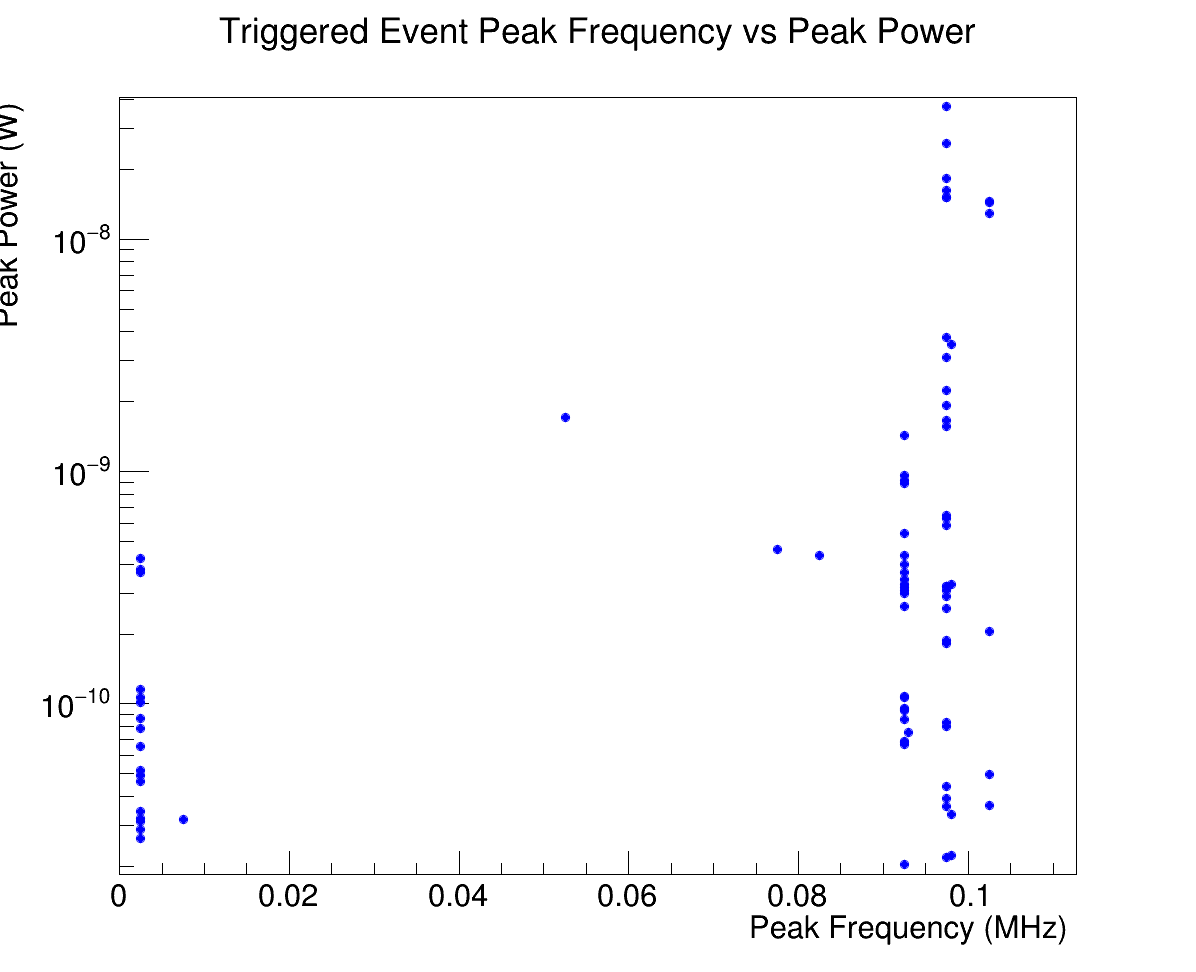

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/rj/new/TriggeredPeakFrequencyVsPower.png has been created


In [6]:
TCanvas *c1 = new TCanvas("c1","TFrqVPow",200,10,1200,1000);
//    c1->SetGrid();
c1->SetLogy(1);
const Int_t n = 90;
TGraph *gr = new TGraph(n,allfreqs,allpows);
gr->SetMarkerColor(4);
// gr->SetMarkerStyle(2);
gr->SetMarkerStyle(20);
gr->SetTitle("Triggered Event Peak Frequency vs Peak Power");
gr->GetXaxis()->SetTitle("Peak Frequency (MHz)");
gr->GetYaxis()->SetTitle("Peak Power (W)");
gr->Draw("AP");
c1->Update();
c1->GetFrame()->SetBorderSize(100);
c1->Modified();
c1->Draw();
c1->SaveAs("/home/rj/new/TriggeredPeakFrequencyVsPower.png");

In [ ]:
// Shuffled loops way (good for macros)
int entries = tree->GetEntries();
int rxs = event->nrx;
// auto *freqs = new double[entries][rxs];
auto *freqs = new double[30][3];
auto *pows = new double[30][3];
double frq;
double pow;

double thresh = 20e-6; 

cout << "Trigger threshold is: " << thresh << "\n" << endl;
for(int k = 0; k < tree->GetEntries(); k++){
    tree->GetEntry(k); 
    int trig=0,num=0;
    for(int i=0;i<event->ntx;i++){
        for(int j=0;j<event->nrx;j++){
            trig=event->peakV(i,j)>=thresh?1:0;
            if(trig==1){
                num++;
                // Meat goes here
                frq = event->peakFreq(0,j);
                pow = event->peakPowerW(0,j);
                freqs[k][j]=frq;
                pows[k][j]=pow;
                
                cout << "Event " << k << " triggered on RX " << j << " at " << event->peakV(0,j) << "V ";
                cout << "with peak frequency " << freqs[k][j] << "MHz and power "<< pow << "W" << endl;
            }
            else{
                freqs[k][j] = 0;
            }
            if(num>=event->nrx){
                
            }
        }
    }
}
double *allfreqs = new double[90];
double *allpows = new double[90];
int count = 0;
for(int entry = 0; entry < tree->GetEntries()-1; entry++){
    for(int rx = 0; rx < event->nrx; rx++){
        cout << "event " << entry << " freq: " << freqs[entry][rx] << "MHz, power: " << pows[entry][rx] << endl;
        allfreqs[count] = freqs[entry][rx];
        allpows[count]= pows[entry][rx];
        count++;
    }
}



In [ ]:
const int *entriesasdf = new int(tree->GetEntries());
const int *rxsasdf = new int(event->nrx);

const int *entries = entriesasdf;
const int *rxs = rxasdf; 


cout << entries << rxs;
auto *freqs = new double[entries][rxs];

In [ ]:
// Function way (not macro compatible)

int triggered(double thresh, int n_antennas){
  int trig=0,num=0;
  for(int i=0;i<event->ntx;i++){
    for(int j=0;j<event->nrx;j++){
      trig=event->peakV(i,j)>=thresh?1:0;
      if(trig==1)num++;
      if(num>=event->nrx)return 1;
    }
  }
  return trig;
}

double thresh = 20e-6; 
// ~RoUgHlY~ a little more than background thermal noise RMS according to Steve is 5-10microVolts,
// thresh is set to 20microVolts
cout << "Trigger threshold is: " << thresh << endl;
for(int k = 0; k < tree->GetEntries(); k++){
    tree->GetEntry(k);
    if (triggered(thresh, 2) == 1){
        cout << "\nEvent " << k << " triggered: " << event->peakV(0,0) << "V";
    }
}
